# Iterative Prisoner's Dilemma


### Description

The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*

It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$

In an Iterative Prisoner's Dilemma (IPD), two players play prisoner's dilemma more than once in succession and they remember previous actions of their opponent and change their strategy accordingly. The winning strategy is the one which yields to a larger reward at the end of the IPD.

The strategy can be represented as a function which outputs either $u_C$ or $u_D$. Such function can depend on the opponent's history of moves, her on history of moves, on the number of moves played till that moment and so on, but it can only be based on a probability density function. Possible strategies are:

* **Nice guy**: always cooperate (the function's output is always $u_D$)
* **Bad guy**: always defect 
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move

Many more and much more complex strategies can be implemented. The strategy can even change during the IPD.


### Assignments

* Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations. 
* Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme
* Iterate what done in the previous task (repeated MPIPD, rMPIPD)  by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration
* (*difficult*) Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from abc import ABC, abstractmethod

class Player(ABC):
    """Abstract class, declare the move method"""
    @abstractmethod
    def move(self):
        pass

In [3]:
class NiceGuy(Player):
    """
    Player that always outputs the cooperate move
    """
    def __init__(self, r_history=[], move_history=[]):
        self.r_history = r_history
        self.move_history = move_history  
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def move(self):
        uc = [1,0]
        self.move_history.append(uc)
        return uc

    
class BadGuy(Player):
    """
    Player that always outputs the defect move
    """
    def __init__(self, r_history=[], move_history=[]):
        self.r_history = r_history
        self.move_history = move_history
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def move(self):
        ud = [0,1]
        self.move_history.append(ud)
        return ud

    
class KBadGuy(Player):
    """
    Player that outputs the defect move 
    with probability k/100
    """
    def __init__(self, k, r_history=[], move_history=[]):
        self.k = k
        self.r_history = r_history
        self.move_history = move_history
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def move(self):
        uc = [1,0]
        ud = [0,1]
#         asd = np.random.rand() 
        if np.random.rand() > 1-(self.k/100):
            u = ud
        else:
            u = uc        
        self.move_history.append(u)
        return u
 

class Tit4Tat(Player):
    """
    Player, the first move is cooperate, 
    the subsequent moves are the same as the last 
    element in self.input_history
    """
    def __init__(self, r_history=[], move_history=[], input_history=[]):
        self.r_history = r_history
        self.move_history = move_history 
        self.input_history = input_history
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def append_input(self, inp):
        self.input_history.append(inp)
        
    def move(self):
        if len(self.input_history) == 0:
            u = [1,0]
        else:
            u = self.input_history[-1]
        self.move_history.append(u)
        return u

## Examples of players classes

In [4]:
nice_guy = NiceGuy()

for i in range(10):
    u = nice_guy.move()
print(u)
print(nice_guy.move_history)
print(nice_guy.r_history)


[1, 0]
[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]
[]


In [5]:
pino = KBadGuy(30)
for i in range(10):
    u = pino.move()
print(u)
print(pino.move_history)

[1, 0]
[[1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0]]


In [6]:

t4t_guy = Tit4Tat()
u = t4t_guy.move()
print("first move ",u)

print(t4t_guy.move_history)
t4t_guy.input_history.append([0,1])
u = t4t_guy.move()
print("second move (mirrored) ", u)

first move  [1, 0]
[[1, 0]]
second move (mirrored)  [0, 1]


## Experiment with players interaction

In [7]:
# Payoff matrix
M = np.array([[2,0],[3,1]])
print(M)

# for practicity we are using u as horizontal arrays
# initialize players instances
p1 = Tit4Tat([],[],[])
p2 = KBadGuy(40,[],[])

# game loop
for i in range(100):
    u1 = p1.move()
    u2 = p2.move()
    #append p2 move, necessary for the tit4tat
    p1.append_input(u2)
    
    p1.append_reward(np.array(u1) @ M @ np.array(u2).T)
    p2.append_reward(np.array(u2) @ M @ np.array(u1).T)

[[2 0]
 [3 1]]


player1 final reward  171
player2 final reward  171


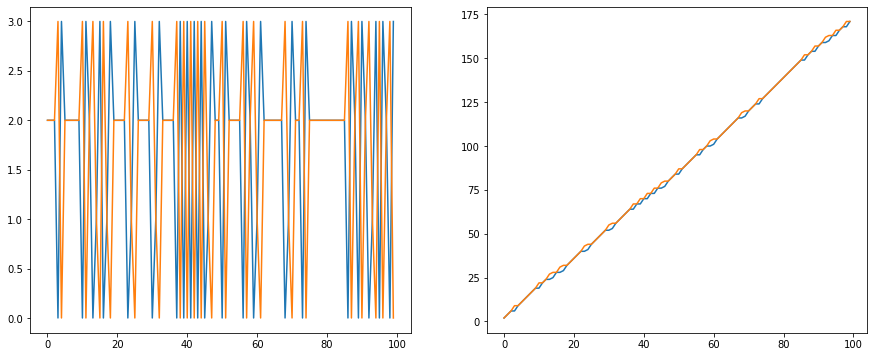

In [8]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(p1.r_history)
ax[0].plot(p2.r_history)
ax[1].plot(np.cumsum(p1.r_history))
ax[1].plot(np.cumsum(p2.r_history))


print("player1 final reward ", sum(p1.r_history))
print("player2 final reward ", sum(p2.r_history))

# Multiple Players Iterative Prisoner's Dilemma (MPIPD)

In order to extend our game to a N-Players scenario, we started from the normal form matrix proposed in [1]:
<br><br>

$$
M = 
\begin{pmatrix} 
R & K & S \\
T & L & P 
\end{pmatrix}
$$
<br>
where the first collumn identifies the case in which all the N-1 players decide to collaborate (strategy $(C...C)$), the second one the case in which at least one player decides to defect (strategy $(C...D)$), and the last one represent the case where every N-1 player chooses to defect (strategy $(D...D)$).
<br><br>
Furthermore, the strategy D has to continue to be the dominant one, thus we added few more constraint on the values of $R,K,S,T,L,P$:

$$
\begin{cases}
T > R > L > K > P > S\\
2R > T+S\\
2K > S+L
\end{cases}
$$
<br>
These constraints lead to the following pyaoff matrix that will be used for the rest of the project:
<br><br>
$$
M = 
\begin{pmatrix} 
7 & 3 & 0 \\
9 & 5 & 1 
\end{pmatrix}
$$
<br>
Thanks to the linear algebra formulation of the problem, we won't need to define the players payoffs for every combination in the outcome set $\{C,D\}^N$.<br>
In fact, the player $i$ payoff can be easly computed as:
$$
r_i = u_i^T M u_{N-1}
$$
<br>
where $u_{N-1}$ is defined as:

$$
u_{N-1} =
\begin{cases}
[1,0,0]\quad \textrm{if all the N-1 players play C}\\
[0,1,0]\quad \textrm{if at least one of the N-1 players plays D}\\
[0,0,1]\quad \textrm{if all the N-1 players play D}
\end{cases}
$$
<br>
When we refer to an IPD, new strategies can be defined such as:
* **tit-for-tat-MPIPD**: start by cooperating, then repeat what the majority of the opponets has done in the previous move.
* **Grim-Trigger guy**: start cooperating and keep cooperating till the other does too. If the other defects, start defecting from now on, no matter what the other does.



From game theory we know that the last round will be played selfishly and a Nash Equilibrium will be played from rational players; thus the last outcome will be $C.....C$ (every player chooses to defect), leading to a low payoff equal to 1.
However it is evident that, if the number of game iterations $T$ is greater than $T_{th} = \frac{14}{6}$, cooperating till the last but one round would be the best strategy given that:

$$
(T-1)*(C...C)+(D...D) > (C...D) + (T-1)(D...D)\\
7(T-1)+1 > 9 + (T-1)\\
\textrm{that with:}\quad T=3>T_{th}\quad \textrm{leads to:}\quad 15 > 11
$$





References:<br>
[1]: https://www.researchgate.net/publication/295855229_Iterated_symmetric_three-player_prisoner%27s_dilemma_game

M2
[[7 3 0]
 [9 5 1]]
player0 final reward 498. Player type: <class '__main__.Tit4Tat'>
player1 final reward 372. Player type: <class '__main__.KBadGuy'>
player2 final reward 300. Player type: <class '__main__.NiceGuy'>
player3 final reward 500. Player type: <class '__main__.BadGuy'>
player4 final reward 414. Player type: <class '__main__.KBadGuy'>


"\n\nIf you use just two player and you set T=3 and R=2, you obtain the same result of the previous point.\nThus I hope that it's actually working.\n\n\n"

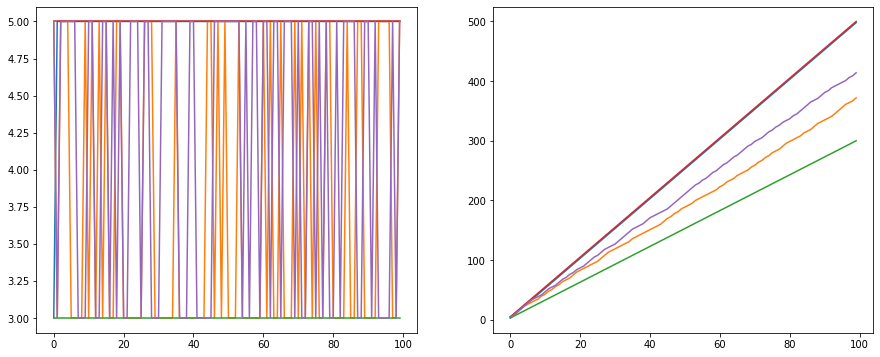

In [9]:
#MPIPD source: https://www.researchgate.net/publication/295855229_Iterated_symmetric_three-player_prisoner%27s_dilemma_game
#      source2: https://www.classes.cs.uchicago.edu/archive/1998/fall/CS105/Project/node6.html


T=9; R=7; L=5; K=3; P=1; S=0;

# Payoff matrix
M2 = np.array([[R, K, S],[T, L, P]])
print("M2")
print(M2)

# initialize players instances

p1 = Tit4Tat([],[],[])
p2 = KBadGuy(40,[],[])
p3 = NiceGuy([],[])
p4 = BadGuy([],[])
p5 = KBadGuy(60,[],[])

P = [p1, p2, p3, p4, p5]

# game loop
for i in range(100):
    
    U = np.array([P[i].move() for i in range(len(P))]).T #matrix with all the players move of this round
    
    for k in range(len(P)):   #for each player   
        #get moves of others player (if CC, CD or DD)
        #problems with case k=0 and k=len(P) solved in silly way
        if(k!=0 and k!= len(P)-1): 
            others_moves = np.prod(U[:,0:k], axis=1) * np.prod(U[:, k:], axis=1)
        elif(k==(len(P)-1)):
            others_moves = np.prod(U[:,0:k], axis=1)
        else:
            others_moves = np.prod(U[:,1:], axis=1)

        
        if(np.array(others_moves == [1,0]).all()): #case CC
            
            others_moves = np.array([1,0,0])
            
        elif(np.array(others_moves == [0,0]).all()): #case CD
            
            others_moves = np.array([0,1,0])

        else: #case DD
            
            others_moves = np.array([0,0,1])
            
        
        #check if player is tit4tat, if yes, update input history
        if(isinstance(P[k], Tit4Tat)):
            
            if(others_moves[0] == 1): #the others played CC
                P[k].append_input([1,0])
            
            else: #the others played CD or DD                
                P[k].append_input([0,1])
                
        
        P[k].append_reward(U[:,k] @ M2 @ others_moves.T)
        
        
  
fig, ax = plt.subplots(1,2, figsize = (15,6))



for i in range(len(P)):

    print("player"+ str(i) +" final reward "+ str(sum(P[i].r_history)) +". Player type: " + str(type(P[i])))
    ax[0].plot(P[i].r_history)
    ax[1].plot(np.cumsum(P[i].r_history), l)



'''

If you use just two player and you set T=3 and R=2, you obtain the same result of the previous point.
Thus I hope that it's actually working.


'''